<a href="https://colab.research.google.com/github/raviwaar/newcodes/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Shou Nakano: 180372910
# Ravi Narayan Mahawar: 225839570

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# We'll import the data from new.csv here, which has been modified so that it'll work.
# Before you do anything with this Colab, such as running it, you'll need to download the modified version of new.csv, which you can download here:
# https://drive.google.com/file/d/1REzq-yec51JPmvCCykUTws186w_lkaJT/view?usp=sharing
# This was done because the dataset on Kaggle contained several unknown characters that Google Colab couldn't properly parse.
# We were able to parse out most of them, but Google Colab either returned an error or simply stopped parsing the dataset at that point, so the dataset had to be manually altered.
# Then, you can click on the folder on the left hand side and upload new.csv, which will let you use it in the Colab.

# If this isn't working and you only see 2,000 rows of data, please make sure that you're using Google Colab, as JupyterLab won't work.
# The only modification that was made to the original dataset was removing the Chinese or any unknown characters in the floor parameter.
data = pd.read_csv('new.csv', na_values =['nan', '#NAME?', 'NaN', '�ֻ�ṹ', 'δ', 'δ֪'])
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1.111027e+12,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1.111027e+12,2016-07-28,903.0,126,575.0,43436,...,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1.111041e+12,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1.111043e+12,2016-09-30,965.0,138,297.5,22202,...,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1.111027e+12,2016-08-28,927.0,286,392.0,48396,...,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1.111027e+12,2016-06-10,1.0,8,350.0,20580,...,4.0,2003.0,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1.111027e+12,2016-06-10,NaN,1,108.8,31006,...,1.0,2009.0,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1.111027e+12,2016-06-05,1.0,2,359.0,35138,...,4.0,2000.0,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1.111027e+12,2016-06-12,NaN,4,720.0,40373,...,4.0,2003.0,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [ ]:
# Now, we'll need to pre-process the data in order to properly use it for our models.
# First, we'll remove the feature 'Day on Market' due to it having too much missing data, as 157,977 values are missing.
# We'll also drop other features that aren't stated to have been dropped in the paper, but aren't included on Page 3.
data = data.drop('DOM', axis = 1)
data = data.drop('url', axis = 1)
data = data.drop('id', axis = 1)
data = data.drop('Cid', axis = 1)
data = data.drop('totalPrice', axis = 1)
len(data)

318851

In [ ]:
# Next, we'll get rid of any rows with missing or unknown data, such as $NAME?, δ֪ and NaN.
data = data.dropna()
#data = data[data.livingRoom.astype('str').str.isnumeric()]
data = data[data['floor'].str.contains("δ")==False]
data = data[data['floor'].str.contains("δ֪")==False]
len(data)

296712

In [ ]:
# Next, we'll drop the features for the number of kitchens, bathrooms and drawing rooms due to their ambiguity.
data = data.drop('kitchen', axis = 1)
data = data.drop('bathRoom', axis = 1)
data = data.drop('drawingRoom', axis = 1)
data.max(axis='index')

Lng                    116.711337
Lat                     40.252758
tradeTime              2018-01-28
followers                    1143
price                      150000
square                      640.0
livingRoom                    8.0
floor                           9
buildingType                  4.0
constructionTime           2016.0
renovationCondition             4
buildingStructure               6
ladderRatio            10009400.0
elevator                      1.0
fiveYearsProperty             1.0
subway                        1.0
district                       13
communityAverage         183109.0
dtype: object

In [ ]:
# Next, we'll set a limit for the feature livingRooms, which will be from 1 to 4.
# The variable livingRoom actually contains the number of bedrooms that the house has, so we're setting a limit for the number of bedrooms.
data["livingRoom"] = data[["livingRoom"]].apply(pd.to_numeric)
data["livingRoom"] = data['livingRoom'].where(data['livingRoom'] >= 1, 1)
data["livingRoom"] = data['livingRoom'].where(data['livingRoom'] <= 4, 4)
data.max(axis='index')

Lng                    116.711337
Lat                     40.252758
tradeTime              2018-01-28
followers                    1143
price                      150000
square                      640.0
livingRoom                    4.0
floor                           9
buildingType                  4.0
constructionTime           2016.0
renovationCondition             4
buildingStructure               6
ladderRatio            10009400.0
elevator                      1.0
fiveYearsProperty             1.0
subway                        1.0
district                       13
communityAverage         183109.0
dtype: object

In [ ]:
#Now, we'll need to get the distance of the houses from Beijing using the Lng and Lat features.
from geopy.distance import geodesic

#This will need to run for every row in the dataframe, so this will a long time to complete.
#It took around 1 minute and 21 seconds for me on Google Colab.
data['distance'] = data.apply(lambda data: geodesic((data['Lat'], data['Lng']), (39.916668, 116.4074)).kilometers, axis=1)
data.iloc[0]

Lng                    116.475489
Lat                      40.01952
tradeTime              2016-08-09
followers                     106
price                       31680
square                      131.0
livingRoom                    2.0
floor                          26
buildingType                  1.0
constructionTime           2005.0
renovationCondition             3
buildingStructure               6
ladderRatio                 0.217
elevator                      1.0
fiveYearsProperty             0.0
subway                        1.0
district                        7
communityAverage          56021.0
distance                12.816259
Name: 0, dtype: object

In [ ]:
#Next, we'll need to create a new column for the age of the house by subtracting its' construction time from 2019.
data['age'] = data.apply(lambda data: 2019-data['constructionTime'], axis=1)
#We can also drop constructionTime, as it's redundant now that we have the age of the house.
data = data.drop('constructionTime', axis = 1)
data.iloc[0]

Lng                    116.475489
Lat                      40.01952
tradeTime              2016-08-09
followers                     106
price                       31680
square                      131.0
livingRoom                    2.0
floor                          26
buildingType                  1.0
renovationCondition             3
buildingStructure               6
ladderRatio                 0.217
elevator                      1.0
fiveYearsProperty             0.0
subway                        1.0
district                        7
communityAverage          56021.0
distance                12.816259
age                          14.0
Name: 0, dtype: object

Text(0, 0.5, 'Count')

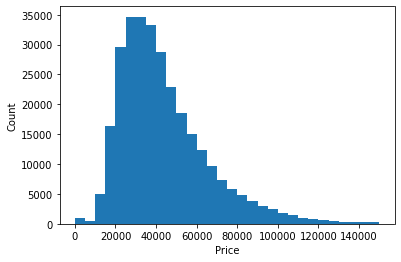

In [ ]:
#Next, we'll need to set minimum values for price and area (which is square). In order to set these values, we'll graph both of these variables.
plt.hist(data['price'], bins = 30)
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

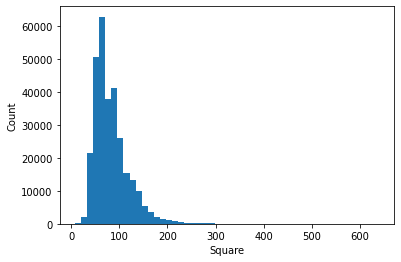

In [ ]:
plt.hist(data['square'], bins = 50)
plt.xlabel("Square")
plt.ylabel("Count")

In [ ]:
# We can also use the quantile function to further understand the data returned by the histograms.
data.quantile(.05)

Lng                      116.235609
Lat                       39.799417
followers                  0.000000
price                  18136.000000
square                    42.120000
livingRoom                 1.000000
buildingType               1.000000
renovationCondition        1.000000
buildingStructure          2.000000
ladderRatio                0.158000
elevator                   0.000000
fiveYearsProperty          0.000000
subway                     0.000000
district                   1.000000
communityAverage       36774.000000
distance                   4.186077
age                        8.000000
Name: 0.05, dtype: float64

In [ ]:
# Thus, it seems reasonable to set 10,000 as the minimum value for the house's price.
data["price"] = data['price'].where(data['price'] >= 10000, 10000)

In [ ]:
# Thus, it seems reasonable to set the minimum value for the area to 40 square feet.
data["square"] = data['square'].where(data['square'] >= 40, 40)

In [ ]:
# Unfortunately, we'll have to skip the last data pre-processing step, as the Chinese characters didn't properly load on my PC.
# Not only that, I couldn't even load the CSV dataset without manually removing them from the file.
# Thus, we'll only be able to rename the column floor to floorHeight.
data = data.rename(columns={"floor": "floorHeight"})

In [ ]:
# Now, we'll update the types of the columns so that they match the types provided in the research paper.
from datetime import datetime
data["age"] = data['age'].astype('int')
# We'll clean up the dateTime variable by taking the year and turning it into an int, as stated in the paper.
data['tradeTime'] = data.apply(lambda data: datetime.strptime(data['tradeTime'], '%Y-%m-%d').year, axis=1)
data["livingRoom"] = data['livingRoom'].astype('int')
data["floorHeight"] = data['floorHeight'].astype('int')
data["buildingType"] = data['buildingType'].astype('int')
data["elevator"] = data['elevator'].astype('int')
data["fiveYearsProperty"] = data['fiveYearsProperty'].astype('int')
data["subway"] = data['subway'].astype('int')

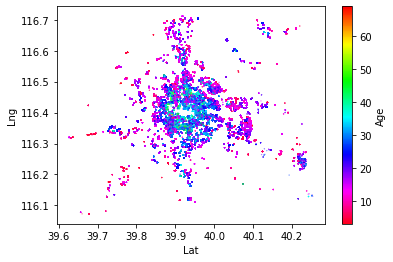

In [ ]:
# Although it might look like we should get rid of the outliers before graphing the data, we need to re-create the models seen in the paper, first.
# I found out that graphing the data here will get us the graphs in the paper, as opposed to deleting the outliers and then graphing the data.
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.scatter(data['Lat'], data['Lng'], c=data['age'], cmap="hsv_r", s=0.05)
plt.xlabel("Lat")
plt.ylabel("Lng")
plt.colorbar(label="Age")
plt.show()

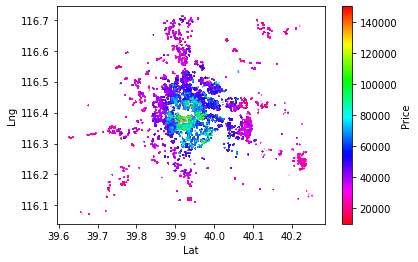

In [ ]:
plt.scatter(data['Lat'], data['Lng'], c=data['price'], cmap="hsv_r", s=0.05)
plt.xlabel("Lat")
plt.ylabel("Lng")
plt.colorbar(label="Price")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Price')

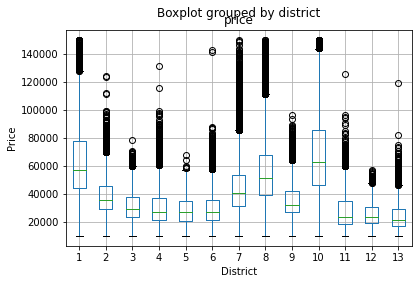

In [ ]:
data.boxplot(column = 'price', by = 'district')
plt.xlabel("District")
plt.ylabel("Price")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Price')

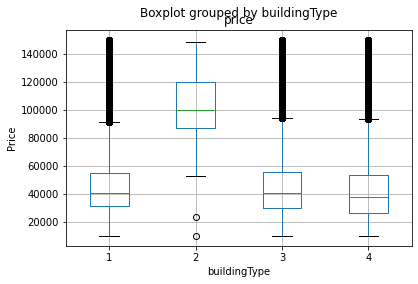

In [ ]:
data.boxplot(column = 'price', by = 'buildingType')
plt.xlabel("buildingType")
plt.ylabel("Price")

In [ ]:
# Our final step in processing the data is to get rid of outliers that lie outside of the range set by Q1-1.5*IQR and Q3+1.5*IQR.
# We'll need to do this with all of the columns in the dataset.
quartileOne = data.quantile(0.25)
quartileThree = data.quantile(0.75)
interQuartileRange = quartileThree - quartileOne
condition = ~((data < (quartileOne - 1.5 * interQuartileRange)) | (data > (quartileThree + 1.5 * interQuartileRange))).any(axis=1)
data = data[condition]

In [ ]:
data.dtypes

Lng                    float64
Lat                    float64
tradeTime                int64
followers                int64
price                    int64
square                 float64
livingRoom               int64
floorHeight              int64
buildingType             int64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator                 int64
fiveYearsProperty        int64
subway                   int64
district                 int64
communityAverage       float64
distance               float64
age                      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Area')

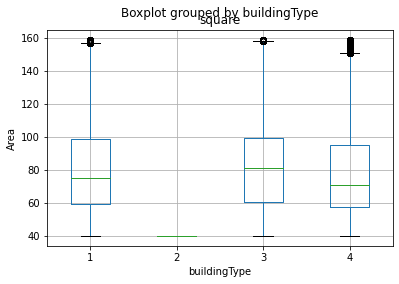

In [ ]:
# The final model is much more similar to the model in the paper once we've removed all of the outliers, although the second column is empty for some reason.
data.boxplot(column = 'square', by = 'buildingType')
plt.xlabel("buildingType")
plt.ylabel("Area")

In [ ]:
# Now, we can make the model the data with the five models in the paper.
# The first model is the Random Forest model, but we'll need to split the data into a training set and a test set, first.
from sklearn.model_selection import train_test_split
x = data[['Lng', 'Lat', 'tradeTime', 'followers', 'square', 'livingRoom', 'floorHeight', 'buildingType', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district', 'communityAverage', 'distance', 'age']]
x

,Lng,Lat,tradeTime,followers,square,livingRoom,floorHeight,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distance,age
17,116.284755,39.934530,2016,6,64.28,1,19,1,3,6,0.111,1,0,1,8,70141.0,10.670419,10
19,116.284755,39.934530,2016,41,52.00,1,19,1,3,6,0.111,1,0,1,8,70141.0,10.670419,10
27,116.284755,39.934530,2016,13,52.00,1,19,1,3,6,0.111,1,0,1,8,70141.0,10.670419,10
34,116.416572,40.063191,2016,19,69.96,3,11,3,1,6,0.200,1,0,1,6,45854.0,16.287947,9
56,116.314388,39.972347,2016,18,151.80,2,22,1,3,6,0.286,1,1,1,8,75591.0,10.070149,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318843,116.530566,39.827437,2016,4,62.88,1,6,4,1,2,0.333,0,0,0,4,44396.0,14.463464,16
318844,116.550348,39.755625,2016,6,118.02,2,5,4,4,6,0.500,0,1,0,3,33518.0,21.666659,13
318845,116.546899,39.755236,2016,8,134.20,3,9,3,4,6,0.500,1,1,0,3,36545.0,21.537264,10
318847,116.497474,39.810115,2016,1,40.00,1,24,1,1,6,0.222,1,0,1,3,54282.0,14.119723,10


In [ ]:
y = data['price']
y

17        32981
19        33577
27        40385
34        50672
56        43149
          ...  
318843    28945
318844    22709
318845    26491
318847    31006
318848    35138
Name: price, Length: 185299, dtype: int64

In [ ]:
# Now, we can split the data into a training set and a test set with a ratio of 4:1, as stated in the paper.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain

,Lng,Lat,tradeTime,followers,square,livingRoom,floorHeight,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distance,age
44635,116.475341,39.880705,2016,6,54.97,2,6,4,1,2,0.333,0,0,1,7,58502.0,7.050127,28
167646,116.464138,39.923098,2016,12,58.17,2,18,1,3,6,0.333,1,1,1,7,73671.0,4.902993,34
149820,116.471931,40.008739,2015,7,126.82,2,28,1,1,6,0.375,1,1,1,7,57510.0,11.615033,21
263687,116.355665,40.016785,2016,11,53.35,1,15,1,1,6,0.182,1,1,0,8,77823.0,11.962879,14
300065,116.348379,39.898284,2013,11,60.97,1,28,1,1,6,0.333,1,0,1,10,80976.0,5.443994,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261179,116.354191,40.035178,2015,3,62.55,1,27,3,4,6,0.400,1,0,0,8,65278.0,13.921573,10
305512,116.345639,39.909672,2014,1,45.60,1,18,1,3,2,0.125,1,1,1,10,100053.0,5.337511,26
186419,116.481564,39.933347,2016,7,40.00,1,6,4,4,2,0.250,0,1,1,7,61195.0,6.605008,37
300141,116.346469,39.882483,2013,1,46.47,1,11,3,1,6,0.167,1,0,0,10,81221.0,6.446617,15


In [ ]:
yTrain

44635     60943
167646    45557
149820    25627
263687    50235
300065    47565
          ...  
261179    32455
305512    62720
186419    43124
300141    34431
95256     17400
Name: price, Length: 148239, dtype: int64

In [ ]:
xTest

,Lng,Lat,tradeTime,followers,square,livingRoom,floorHeight,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distance,age
93850,116.346630,40.096608,2011,0,141.04,3,6,4,1,2,0.500,1,0,1,6,48298.0,20.642399,15
187981,116.594761,39.921447,2016,11,103.87,2,6,4,4,2,0.500,0,1,1,7,45906.0,16.027137,19
129291,116.430562,40.045549,2012,0,99.25,2,26,1,1,6,0.300,1,1,0,7,52306.0,14.446323,15
163996,116.455671,39.905762,2015,0,136.44,3,22,1,4,6,0.250,1,1,1,7,61913.0,4.301350,19
218838,116.169630,39.760938,2015,4,84.60,2,13,3,4,6,0.333,1,0,0,5,36637.0,26.705239,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295209,116.343245,39.900529,2011,0,40.00,1,20,1,1,6,0.121,1,1,1,10,92360.0,5.771002,15
136501,116.404605,39.972234,2013,28,44.14,1,6,4,1,2,0.500,0,1,1,7,73871.0,6.174313,26
255379,116.365511,40.036171,2014,0,92.31,2,13,4,3,6,0.500,1,1,0,8,68148.0,13.742938,14
21399,116.175983,39.767012,2016,17,58.00,1,11,4,4,6,0.333,1,0,0,5,31844.0,25.854016,13


In [ ]:
yTest

93850     19215
187981    28883
129291    23880
163996    37233
218838    20095
          ...  
295209    39728
136501    51201
255379    40733
21399     24137
315394    57760
Name: price, Length: 37060, dtype: int64

In [ ]:
from sklearn.model_selection import cross_validate
k_folds = 5
scoring = {'rmse': 'neg_root_mean_squared_error', 'r2': 'r2'}
def cv(model):
    scores = cross_validate(model, xTrain, yTrain, cv=k_folds, scoring=scoring, return_train_score=True)
    
    scores['test_rmse'] = -scores['test_rmse']
    scores['train_rmse'] = -scores['train_rmse']
    scores['rmse'] = scores['test_rmse'].mean()
    scores['r2'] = scores['test_r2'].mean()
    
    print(f"RMSE:\t{scores['rmse']:.3f} +-{scores['test_rmse'].std():.3f}")
    print(f"R2:\t{scores['r2']:.3f} +-{scores['test_r2'].std():.3f}")

    return scores

def cv_stacked(model, xTrain, yTrain):
    scores = cross_validate(model, xTrain, yTrain, cv=k_folds, scoring=scoring, return_train_score=True)
    
    scores['test_rmse'] = -scores['test_rmse']
    scores['train_rmse'] = -scores['train_rmse']
    scores['rmse'] = scores['test_rmse'].mean()
    scores['r2'] = scores['test_r2'].mean()
    
    print(f"RMSE:\t{scores['rmse']:.3f} +-{scores['test_rmse'].std():.3f}")
    print(f"R2:\t{scores['r2']:.3f} +-{scores['test_r2'].std():.3f}")

    return scores

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We can now fit each of the models to the data and evaluate them.
# I tried lowering the max depth to 6, since that should limit the height and the complexity of the trees, but it still didn't return a trained model.
# I talked to the professor about this and you can replace the code here with the code for another algorithm.
# Please make sure that it has a similar quality to the other two models that were used.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostRegressor

#randomForest = RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=0, n_estimators=900, n_jobs=-1)
#randomForest.fit(xTrain, yTrain)

#Cat Boost Classifier
clf = CatBoostRegressor(iterations=10, learning_rate=1, depth=16)
clf.fit(xTrain, yTrain)

0:	learn: 6984.7319794	total: 2.51s	remaining: 22.6s
1:	learn: 6286.2635117	total: 5.49s	remaining: 22s
2:	learn: 5919.9135730	total: 9.19s	remaining: 21.4s
3:	learn: 5638.6976632	total: 13.2s	remaining: 19.8s
4:	learn: 5499.2208042	total: 17.2s	remaining: 17.2s
5:	learn: 5353.2566542	total: 20.9s	remaining: 14s
6:	learn: 5157.7815300	total: 24.8s	remaining: 10.6s
7:	learn: 5048.4878861	total: 28.6s	remaining: 7.14s
8:	learn: 4931.2985705	total: 33s	remaining: 3.66s
9:	learn: 4801.3500884	total: 35s	remaining: 0us


In [ ]:
cbPredicted = clf.predict(xTest)
cbPredictedTrain = clf.predict(xTrain)

In [ ]:
# Then, we can use yPredicted in order to calculate the Root Mean Squared Logarithmic Error.
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score
# NOTE: I'm not sure if this is the correct formula, since it might use ln() instead of log(). Please look into this.

print(f"CatBoost Train RMSLE:\t{mean_squared_log_error(yTrain, cbPredictedTrain, squared=False)}")
print(f"CatBoost Test RMSLE:\t{mean_squared_log_error(yTest, cbPredicted, squared=False)}")
print(f"CatBoost Test RMSE:\t{mean_squared_error(yTest, cbPredicted, squared=False)}")
print(f"CatBoost Train Rsquare:\t{r2_score(yTrain, cbPredictedTrain)}")
print(f"CatBoost Test Rsquare:\t{r2_score(yTest, cbPredicted)}")

CatBoost Train RMSLE:	0.12762640520158489
CatBoost Test RMSLE:	0.15271384884736028
CatBoost Test RMSE:	5977.423087777886
CatBoost Train Rsquare:	0.9188273683880488
CatBoost Test Rsquare:	0.8744319368665702


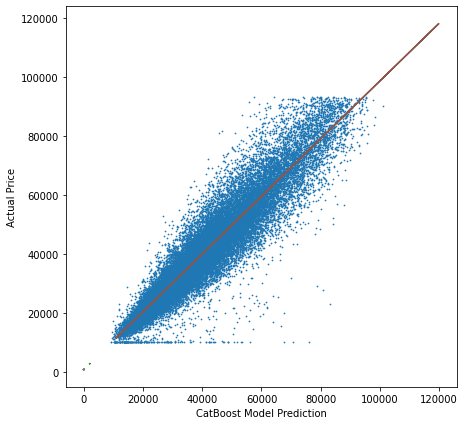

In [ ]:
# Finally, we can graph the line of best fit compared to the data and the predicted values.
a, b = np.polyfit(cbPredicted, yTest, 1)
plt.figure(figsize=(7,7))
plt.scatter(cbPredicted, yTest, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('CatBoost Model Prediction')
plt.ylabel('Actual Price')
plt.savefig('CatBoost Prediction Test.png')

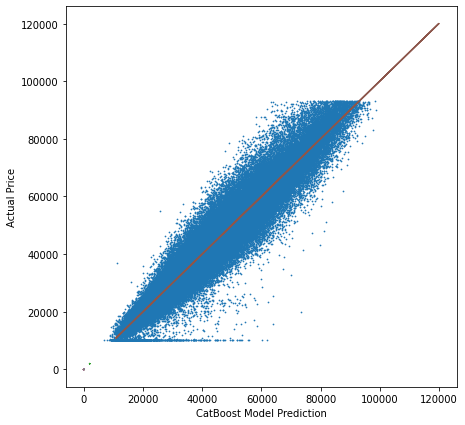

In [ ]:
# Finally, we can graph the line of best fit compared to the data and the predicted values.
a, b = np.polyfit(cbPredictedTrain, yTrain, 1)
plt.figure(figsize=(7,7))
plt.scatter(cbPredictedTrain, yTrain, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('CatBoost Model Prediction')
plt.ylabel('Actual Price')
plt.savefig('CatBoost Prediction Train.png')

In [ ]:
# The second model is the Extreme Gradient Boosting/XGBoost model.
import xgboost as xgb
dTrain = xgb.XGBRegressor(learning_rate=0.3, min_child_weight=2, subsample=1, colsample_bytre=0.8, reg_lambda=0.45, reg_alpha=0, gamma=0.5)
dTrain.fit(xTrain, yTrain)

[16:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytre=0.8, gamma=0.5, learning_rate=0.3,
             min_child_weight=2, reg_lambda=0.45)

In [ ]:
yXGBPredicted = dTrain.predict(xTest)
yXGBPredictedTrain = dTrain.predict(xTrain)

In [ ]:
# Then, we can use yPredicted in order to calculate the Root Mean Squared Logarithmic Error.
# NOTE: I'm not sure if this is the correct formula, since it might use ln() instead of log(). Please look into this.
print(f"XGBoost Train RMSLE:\t{mean_squared_log_error(yTrain, yXGBPredictedTrain, squared=False)}")
print(f"XGBoost Test RMSLE:\t{mean_squared_log_error(yTest, yXGBPredicted, squared=False)}")
print(f"XGBoost Test RMSE:\t{mean_squared_error(yTest, yXGBPredicted, squared=False)}")
print(f"XGBoost Train Rsquare:\t{r2_score(yTrain, yXGBPredictedTrain)}")
print(f"XGBoost Test Rsquare:\t{r2_score(yTest, yXGBPredicted)}")

XGBoost Train RMSLE:	0.15154330787368886
XGBoost Test RMSLE:	0.15250319396994186
XGBoost Test RMSE:	5906.245840690246
XGBoost Train Rsquare:	0.8764893114567798
XGBoost Test Rsquare:	0.8774045810799668


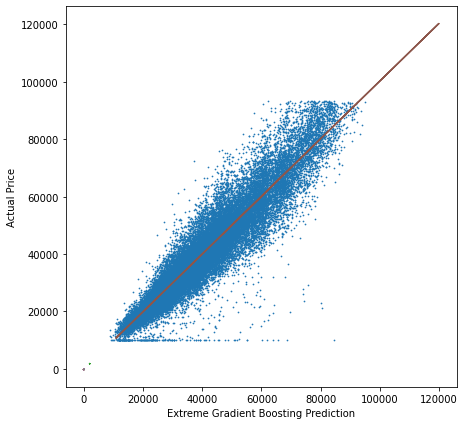

In [ ]:
# Finally, we can graph the line of best fit compared to the data and the predicted values.
a, b = np.polyfit(yXGBPredicted, yTest, 1)
plt.figure(figsize=(7,7))
plt.scatter(yXGBPredicted, yTest,s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Extreme Gradient Boosting Prediction')
plt.ylabel('Actual Price')
plt.savefig('Extreme Gradient Boosting Prediction Test.png')

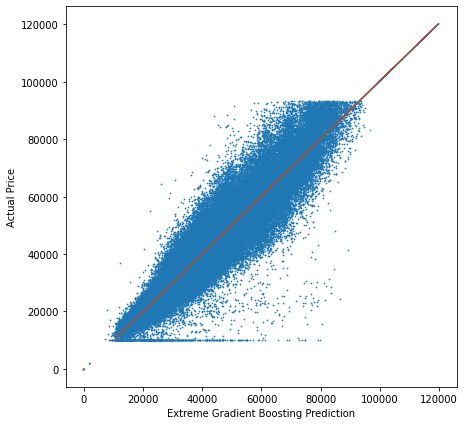

In [ ]:
a, b = np.polyfit(yXGBPredictedTrain, yTrain, 1)
plt.figure(figsize=(7,7))
plt.scatter(yXGBPredictedTrain, yTrain, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Extreme Gradient Boosting Prediction')
plt.ylabel('Actual Price')
plt.savefig('Extreme Gradient Boosting Prediction Train.png')

In [ ]:
# The third model is the Light Gradient Boosting Machine model.
import lightgbm as lgb
bst = lgb.LGBMRegressor(learning_rate=0.15, n_estimators=64, min_child_weight=2, num_leaves=36, colsample_bytree=0.8, reg_lambda=0.4)
bst.fit(xTrain, yTrain)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.15, min_child_weight=2,
              n_estimators=64, num_leaves=36, reg_lambda=0.4)

In [ ]:
yLGBMPredicted = bst.predict(xTest)
yLGBMPredictedTrain = bst.predict(xTrain)

In [ ]:
# Then, we can use yPredicted in order to calculate the Root Mean Squared Logarithmic Error.
# NOTE: I'm not sure if this is the correct formula, since it might use ln() instead of log(). Please look into this.
print(f"LGBM Train RMSLE:\t{mean_squared_log_error(yTrain, yLGBMPredictedTrain, squared=False)}")
print(f"LGBM Test RMSLE:\t{mean_squared_log_error(yTest, yLGBMPredicted, squared=False)}")
print(f"LGBM Test RMSE:\t{mean_squared_error(yTest, yLGBMPredicted, squared=False)}")
print(f"LGM Train Rsquare:\t{r2_score(yTrain, yLGBMPredictedTrain)}")
print(f"LGBM Test Rsquare:\t{r2_score(yTest, yLGBMPredicted)}")

LGBM Train RMSLE:	0.1462067761293272
LGBM Test RMSLE:	0.14815010832786638
LGBM Test RMSE:	5704.604610405066
LGM Train Rsquare:	0.8869210284569176
LGBM Test Rsquare:	0.8856325865524611


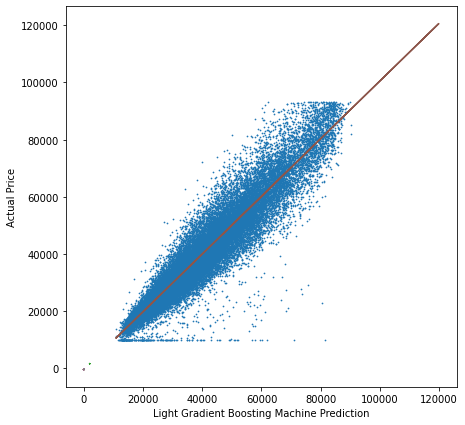

In [ ]:
# Finally, we can graph the line of best fit compared to the data and the predicted values.
a, b = np.polyfit(yLGBMPredicted, yTest, 1)
plt.figure(figsize=(7,7))
plt.scatter(yLGBMPredicted, yTest, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Light Gradient Boosting Machine Prediction')
plt.ylabel('Actual Price')
plt.savefig('Light Gradient Boosting Prediction Test.png')

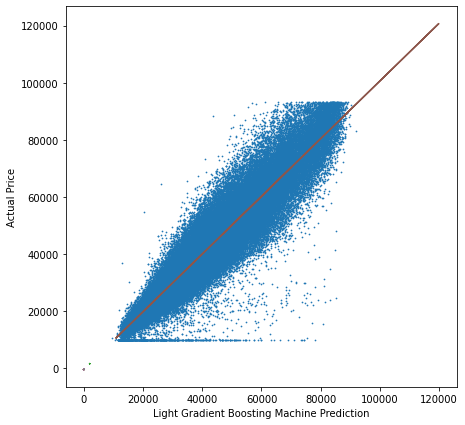

In [ ]:
# Finally, we can graph the line of best fit compared to the data and the predicted values.
a, b = np.polyfit(yLGBMPredictedTrain, yTrain, 1)
plt.figure(figsize=(7,7))
plt.scatter(yLGBMPredictedTrain, yTrain, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Light Gradient Boosting Machine Prediction')
plt.ylabel('Actual Price')
plt.savefig('Light Gradient Boosting Prediction Train.png')

In [ ]:
#These steps are for the Hybrid Regression model.
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)   


In [ ]:
averaged_model = AveragingModels(models = (clf, dTrain, bst))
averaged_model.fit(xTrain, yTrain)
yHybridPred = averaged_model.predict(xTest)
yHybridPredTrain = averaged_model.predict(xTrain)
print(f"Hybrid Model Train RMSLE:\t{mean_squared_log_error(yTrain, yHybridPredTrain, squared=False)}")
print(f"Hybrid Model Test RMSLE:\t{mean_squared_log_error(yTest, yHybridPred, squared=False)}")
print(f"Hybrid Model Test RMSE:\t{mean_squared_error(yTest, yHybridPred, squared=False)}")
print(f"LGM Train Rsquare:\t{r2_score(yTrain, yHybridPredTrain)}")
print(f"Hybrid Model Test Rsquare:\t{r2_score(yTest, yHybridPred)}")

0:	learn: 6984.7319794	total: 2.01s	remaining: 18.1s
1:	learn: 6286.2635117	total: 4.03s	remaining: 16.1s
2:	learn: 5919.9135730	total: 6.04s	remaining: 14.1s
3:	learn: 5638.6976632	total: 9.72s	remaining: 14.6s
4:	learn: 5499.2208042	total: 13s	remaining: 13s
5:	learn: 5353.2566542	total: 15.5s	remaining: 10.3s
6:	learn: 5157.7815300	total: 17.5s	remaining: 7.5s
7:	learn: 5048.4878861	total: 19.5s	remaining: 4.87s
8:	learn: 4931.2985705	total: 21.5s	remaining: 2.38s
9:	learn: 4801.3500884	total: 23.5s	remaining: 0us
[16:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Hybrid Model Train RMSLE:	0.1368059613274998
Hybrid Model Test RMSLE:	0.14575495255997384
Hybrid Model Test RMSE:	5640.382082732661
LGM Train Rsquare:	0.9031308629906964
Hybrid Model Test Rsquare:	0.8881931915415928


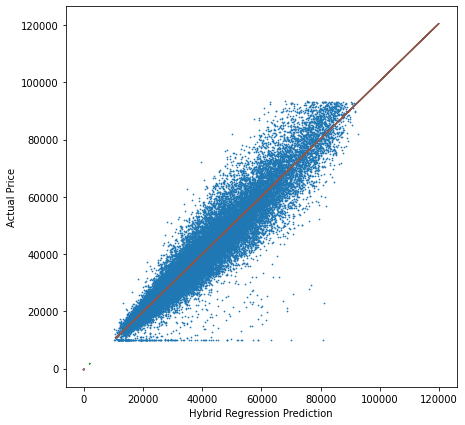

In [ ]:
a, b = np.polyfit(yHybridPred, yTest, 1)
plt.figure(figsize=(7,7))
plt.scatter(yHybridPred, yTest, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Hybrid Regression Prediction')
plt.ylabel('Actual Price')
plt.savefig('Hybrid Regression Prediction Test.png')

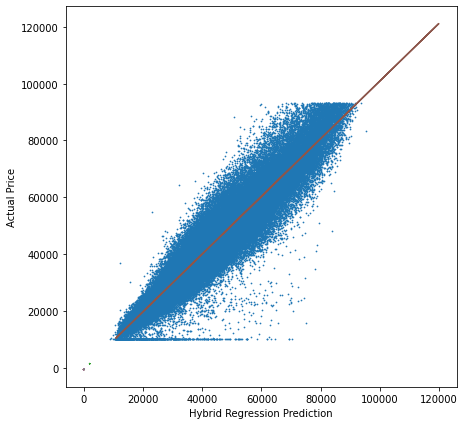

In [ ]:
a, b = np.polyfit(yHybridPredTrain, yTrain, 1)
plt.figure(figsize=(7,7))
plt.scatter(yHybridPredTrain, yTrain, s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Hybrid Regression Prediction')
plt.ylabel('Actual Price')
plt.savefig('Hybrid Regression Prediction Train.png')

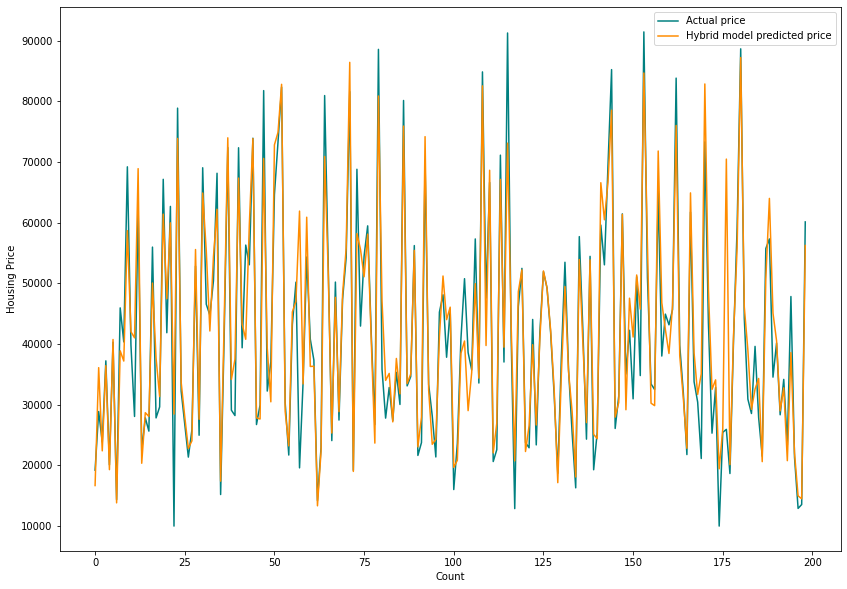

In [ ]:
plt.figure(figsize=(14,10))
yTestNumpy = np.array(yTest)
plt.plot(yTestNumpy[0:199], color='teal', linewidth=1.5, linestyle='-', zorder=1, label='Actual price')
plt.plot(yHybridPred[0:199], color='darkorange', linewidth=1.5, linestyle='-', zorder=2, label='Hybrid model predicted price')
plt.xlabel('Count')
plt.ylabel('Housing Price')
plt.legend()
plt.savefig('Hybrid Regression Comparison.png')

In [ ]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#These steps are for the Stacked Generalization model.
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from vecstack import StackingTransformer

# Init 1st level estimators
estimators_L1 = [('cb', CatBoostRegressor(iterations=10,
                                          learning_rate=1,
                                          depth=16)),
                         ('lgb', lgb.LGBMRegressor(learning_rate=0.15,
                                                   n_estimators=64,
                                                   min_child_weight=2,
                                                   num_leaves=36,
                                                   colsample_bytree=0.8,
                                                   reg_lambda=0.4))]
# Stacking
stack = StackingTransformer(estimators=estimators_L1,
                                    regression=True,
                                    shuffle=True,
                                    random_state=0,
                                    verbose=2)
print(cv(stack))
stack = stack.fit(xTrain, yTrain)
sTrain = stack.transform(xTrain)
sTest = stack.transform(xTest)
# Use 2nd level estimator to get final prediction
estimator_L2 = XGBRegressor(learning_rate=0.3,
                            min_child_weight=2,
                            subsample=1,
                            colsample_bytre=0.8,
                            reg_lambda=0.45,
                            reg_alpha=0,
                            gamma=0.5)
print(cv_stacked(estimator_L2, sTrain, yTrain))
estimator_L2 = estimator_L2.fit(sTrain, yTrain)
yStackedPred = estimator_L2.predict(sTest)
yStackedPredTrain = estimator_L2.predict(sTrain)
print(f"Stacked Model Train RMSLE:\t{mean_squared_log_error(yTrain, yStackedPredTrain, squared=False)}")
print(f"Stacked Model Test RMSLE:\t{mean_squared_log_error(yTest, yStackedPred, squared=False)}")
print(f"Stacked Model Test RMSE:\t{mean_squared_error(yTest, yStackedPred, squared=False)}")
print(f"Stacked Model Train Rsquare:\t{r2_score(yTrain, yStackedPredTrain)}")
print(f"Stacked Model Test Rsquare:\t{r2_score(yTest, yStackedPred)}")

task:         [regression]
metric:       [mean_absolute_error]
variant:      [A]
n_estimators: [2]

estimator  0: [cb: CatBoostRegressor]
0:	learn: 7005.1206956	total: 10.3s	remaining: 1m 33s
1:	learn: 6231.5072557	total: 14.5s	remaining: 57.9s
2:	learn: 5966.1146632	total: 18.4s	remaining: 43s
3:	learn: 5737.8212737	total: 22.5s	remaining: 33.8s
4:	learn: 5518.3076621	total: 26.9s	remaining: 26.9s
5:	learn: 5388.9309016	total: 31.4s	remaining: 20.9s
6:	learn: 5168.4792499	total: 34.4s	remaining: 14.8s
7:	learn: 5119.9158539	total: 36.5s	remaining: 9.12s
8:	learn: 4855.8465300	total: 38.4s	remaining: 4.27s
9:	learn: 4770.0539658	total: 40.4s	remaining: 0us
    fold  0:  [4299.81431592]
0:	learn: 7051.0464585	total: 1.97s	remaining: 17.7s
1:	learn: 6243.4562144	total: 3.94s	remaining: 15.8s
2:	learn: 5968.8188064	total: 5.92s	remaining: 13.8s
3:	learn: 5720.0706339	total: 7.89s	remaining: 11.8s
4:	learn: 5518.6110650	total: 9.86s	remaining: 9.86s
5:	learn: 5298.9761130	total: 11.8s	rema

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

0:	learn: 6847.9724287	total: 1.97s	remaining: 17.8s
1:	learn: 6180.7383994	total: 5.08s	remaining: 20.3s
2:	learn: 5870.5494610	total: 7.05s	remaining: 16.4s
3:	learn: 5653.4341512	total: 9.04s	remaining: 13.6s
4:	learn: 5477.8135782	total: 11s	remaining: 11s
5:	learn: 5274.2244987	total: 13s	remaining: 8.64s
6:	learn: 5068.0116228	total: 14.9s	remaining: 6.39s
7:	learn: 4957.8463140	total: 16.9s	remaining: 4.22s
8:	learn: 4756.4326675	total: 18.9s	remaining: 2.1s
9:	learn: 4623.7303561	total: 20.9s	remaining: 0us
    fold  0:  [4366.23146353]
0:	learn: 6817.8512964	total: 1.94s	remaining: 17.5s
1:	learn: 6156.2020033	total: 3.92s	remaining: 15.7s
2:	learn: 5863.7113508	total: 5.9s	remaining: 13.8s
3:	learn: 5630.2105528	total: 7.88s	remaining: 11.8s
4:	learn: 5442.5501266	total: 11.1s	remaining: 11.1s
5:	learn: 5212.7242397	total: 13.6s	remaining: 9.09s
6:	learn: 5050.1849986	total: 15.6s	remaining: 6.69s
7:	learn: 4954.3679800	total: 17.6s	remaining: 4.4s
8:	learn: 4858.1917445	tota

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

0:	learn: 6850.5511483	total: 1.99s	remaining: 17.9s
1:	learn: 6133.2392391	total: 3.97s	remaining: 15.9s
2:	learn: 5826.2400995	total: 5.95s	remaining: 13.9s
3:	learn: 5590.3038261	total: 7.93s	remaining: 11.9s
4:	learn: 5373.7754802	total: 9.92s	remaining: 9.92s
5:	learn: 5160.7204265	total: 11.9s	remaining: 7.95s
6:	learn: 5011.1426960	total: 13.9s	remaining: 5.96s
7:	learn: 4844.4410746	total: 15.9s	remaining: 3.97s
8:	learn: 4720.7184362	total: 17.8s	remaining: 1.98s
9:	learn: 4661.4643089	total: 19.8s	remaining: 0us
    fold  0:  [4338.60195743]
0:	learn: 7059.9891221	total: 1.99s	remaining: 17.9s
1:	learn: 6289.6054488	total: 4.91s	remaining: 19.6s
2:	learn: 5918.7057200	total: 7.12s	remaining: 16.6s
3:	learn: 5585.8548237	total: 9.11s	remaining: 13.7s
4:	learn: 5422.7973426	total: 11.1s	remaining: 11.1s
5:	learn: 5273.2924596	total: 13.1s	remaining: 8.74s
6:	learn: 5112.3554188	total: 15.1s	remaining: 6.47s
7:	learn: 5024.1733259	total: 17.1s	remaining: 4.26s
8:	learn: 4924.485

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

0:	learn: 6850.7711383	total: 1.97s	remaining: 17.8s
1:	learn: 6160.7364656	total: 3.96s	remaining: 15.8s
2:	learn: 5821.5439418	total: 5.98s	remaining: 14s
3:	learn: 5549.7443215	total: 7.96s	remaining: 11.9s
4:	learn: 5374.1960856	total: 10.6s	remaining: 10.6s
5:	learn: 5195.7008653	total: 13.1s	remaining: 8.73s
6:	learn: 5082.0505509	total: 15.1s	remaining: 6.47s
7:	learn: 4957.1438669	total: 17.1s	remaining: 4.27s
8:	learn: 4792.3341122	total: 19.1s	remaining: 2.12s
9:	learn: 4684.7603845	total: 21s	remaining: 0us
    fold  0:  [4345.63447728]
0:	learn: 7051.6001540	total: 1.98s	remaining: 17.8s
1:	learn: 6321.7185984	total: 3.96s	remaining: 15.8s
2:	learn: 6018.1642141	total: 5.95s	remaining: 13.9s
3:	learn: 5723.2826067	total: 7.93s	remaining: 11.9s
4:	learn: 5419.6481957	total: 9.92s	remaining: 9.92s
5:	learn: 5211.4860868	total: 11.9s	remaining: 7.96s
6:	learn: 5093.8246787	total: 13.9s	remaining: 5.96s
7:	learn: 4918.3834973	total: 15.9s	remaining: 3.97s
8:	learn: 4833.5884155

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

0:	learn: 6847.2246943	total: 1.97s	remaining: 17.8s
1:	learn: 6204.9095285	total: 3.95s	remaining: 15.8s
2:	learn: 5890.3923106	total: 5.92s	remaining: 13.8s
3:	learn: 5624.9186183	total: 7.89s	remaining: 11.8s
4:	learn: 5385.9682851	total: 9.85s	remaining: 9.85s
5:	learn: 5216.0790069	total: 11.8s	remaining: 7.88s
6:	learn: 5087.9890969	total: 13.8s	remaining: 5.92s
7:	learn: 4990.8465236	total: 16.9s	remaining: 4.22s
8:	learn: 4848.8078673	total: 18.9s	remaining: 2.1s
9:	learn: 4767.3356705	total: 20.8s	remaining: 0us
    fold  0:  [4353.14569460]
0:	learn: 7153.5218292	total: 184ms	remaining: 1.66s
1:	learn: 6392.3420594	total: 2.15s	remaining: 8.62s
2:	learn: 6029.2329868	total: 4.13s	remaining: 9.64s
3:	learn: 5618.6747127	total: 6.15s	remaining: 9.23s
4:	learn: 5460.3168074	total: 8.14s	remaining: 8.14s
5:	learn: 5279.5676587	total: 10.1s	remaining: 6.75s
6:	learn: 5083.8044394	total: 12.1s	remaining: 5.2s
7:	learn: 4967.4109429	total: 14.1s	remaining: 3.52s
8:	learn: 4866.04204

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

0:	learn: 7057.6823764	total: 1.98s	remaining: 17.8s
1:	learn: 6365.9583304	total: 3.98s	remaining: 15.9s
2:	learn: 5993.8175175	total: 5.98s	remaining: 14s
3:	learn: 5699.7102181	total: 8s	remaining: 12s
4:	learn: 5435.1234172	total: 10s	remaining: 10s
5:	learn: 5268.1541318	total: 12s	remaining: 8.01s
6:	learn: 5109.4168973	total: 14s	remaining: 6s
7:	learn: 5028.4884330	total: 16s	remaining: 4s
8:	learn: 4904.3666663	total: 18s	remaining: 2s
9:	learn: 4774.1204443	total: 20s	remaining: 0us
    fold  0:  [4293.95112835]
0:	learn: 7027.3700509	total: 1.99s	remaining: 17.9s
1:	learn: 6346.4690356	total: 3.99s	remaining: 16s
2:	learn: 5962.5562907	total: 6s	remaining: 14s
3:	learn: 5633.3224880	total: 8.02s	remaining: 12s
4:	learn: 5428.8896911	total: 10s	remaining: 10s
5:	learn: 5238.2704485	total: 12s	remaining: 8.02s
6:	learn: 5097.3494784	total: 14s	remaining: 6.01s
7:	learn: 4946.2923998	total: 16s	remaining: 4.01s
8:	learn: 4810.7389722	total: 18s	remaining: 2s
9:	learn: 4704.4513

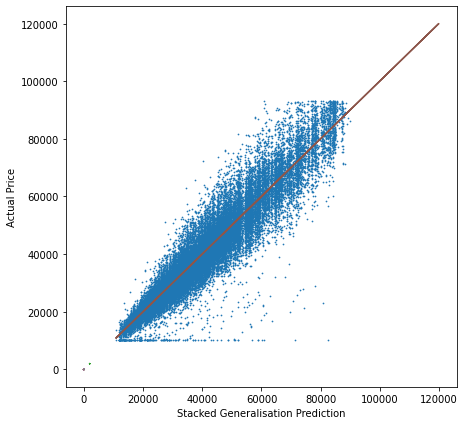

In [ ]:
a, b = np.polyfit(yStackedPred, yTest, 1)
plt.figure(figsize=(7,7))
plt.scatter(yStackedPred, yTest,s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Stacked Generalisation Prediction')
plt.ylabel('Actual Price')
plt.savefig('Stacked Generalisation Prediction Test.png')

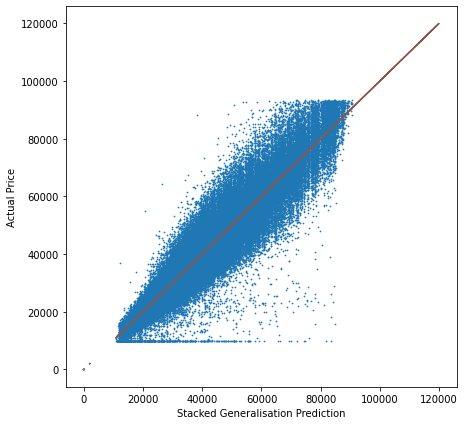

In [ ]:
a, b = np.polyfit(yStackedPredTrain, yTrain, 1)
plt.figure(figsize=(7,7))
plt.scatter(yStackedPredTrain, yTrain,s=0.5)
plt.plot(x, a*x+b)
plt.xlabel('Stacked Generalisation Prediction')
plt.ylabel('Actual Price')
plt.savefig('Stacked Generalisation Prediction Train.png')

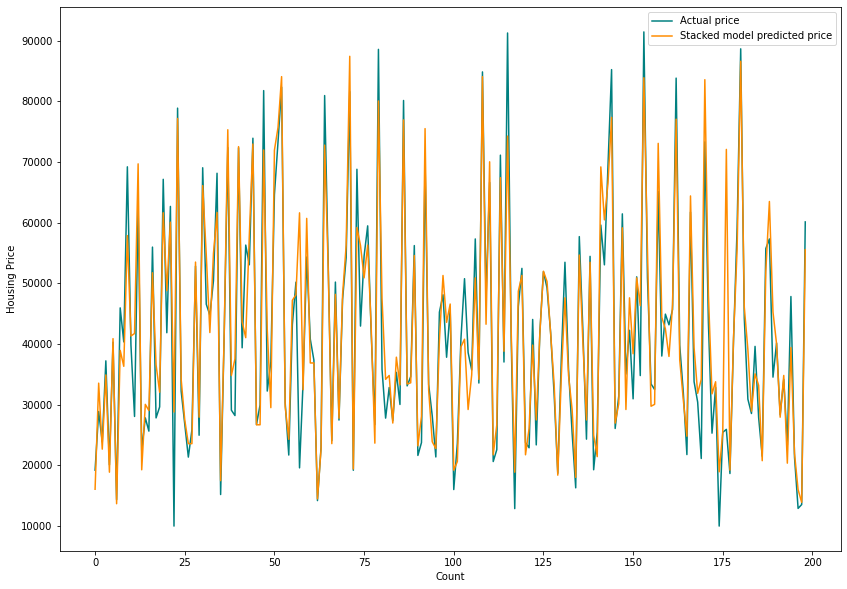

In [ ]:
plt.figure(figsize=(14,10))
yTestNumpy = np.array(yTest)
plt.plot(yTestNumpy[0:199], color='teal', linewidth=1.5, linestyle='-', zorder=1, label='Actual price')
plt.plot(yStackedPred[0:199], color='darkorange', linewidth=1.5, linestyle='-', zorder=2, label='Stacked model predicted price')
plt.xlabel('Count')
plt.ylabel('Housing Price')
plt.legend()
plt.savefig('Stacked Generalisation Comparison.png')